#Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

print("All libraries imported successfully!")

All libraries imported successfully!


#Load and Prepare Iris Dataset

In [2]:
#load Dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Select only two classes: Setosa (0) and Versicolor (1)
mask = (y == 0) | (y == 1)
X = X[mask]
y = y[mask]

# Convert labels: Setosa = 0, Versicolor = 1
y = (y == 1).astype(int)

print(f"Selected {len(X)} samples")
print(f"Setosa: {sum(y==0)}, Versicolor: {sum(y==1)}")
print(f"Features: {feature_names}")

Selected 100 samples
Setosa: 50, Versicolor: 50
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


#Train-Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Data split completed:")
print(f"   Training samples: {X_train.shape[0]}")
print(f"   Testing samples: {X_test.shape[0]}")

Data split completed:
   Training samples: 80
   Testing samples: 20


#Sigmoid Function & Loss Computation

In [4]:
def sigmoid(z):
    """Compute sigmoid to prevent overflow."""
    z = np.clip(z, -250, 250)
    return 1 / (1 + np.exp(-z))

def compute_loss(y_true, y_pred):
    """Binary cross-entropy loss with clipping."""
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

print("Core functions defined.")

Core functions defined.


#Train Logistic Regression with Gradient Descent

In [5]:
def train_logistic_regression(X, y, lr=0.05, epochs=2000):
    m, n = X.shape
    W = np.zeros(n + 1)  # [bias, w1, w2, ..., wn]
    X_b = np.c_[np.ones((m, 1)), X]  # Add bias column

    losses = []

    print("Training started...")
    for epoch in range(epochs):
        # Forward pass
        z = X_b.dot(W)
        y_pred = sigmoid(z)

        # Compute loss
        loss = compute_loss(y, y_pred)
        losses.append(loss)

        # Compute gradient
        error = y_pred - y
        gradient = (1/m) * X_b.T.dot(error)

        # Update weights
        W -= lr * gradient

        # Print progress
        if epoch % 400 == 0:
            train_acc = accuracy_score(y, (y_pred >= 0.5).astype(int))
            print(f"Epoch {epoch:4d} | Loss: {loss:.6f} | Train Acc: {train_acc:.4f}")

    print("Training completed!")
    return W, losses

# Train the model
weights, loss_history = train_logistic_regression(X_train, y_train, lr=0.05, epochs=2001)

Training started...
Epoch    0 | Loss: 0.693147 | Train Acc: 0.5000
Epoch  400 | Loss: 0.035735 | Train Acc: 1.0000
Epoch  800 | Loss: 0.018755 | Train Acc: 1.0000
Epoch 1200 | Loss: 0.012901 | Train Acc: 1.0000
Epoch 1600 | Loss: 0.009908 | Train Acc: 1.0000
Epoch 2000 | Loss: 0.008081 | Train Acc: 1.0000
Training completed!


#Predict and Evaluate Model

In [6]:
def predict(X, weights):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    z = X_b.dot(weights)
    proba = sigmoid(z)
    return (proba >= 0.5).astype(int)

# Make predictions
y_pred = predict(X_test, weights)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\nFinal Accuracy: {accuracy*100:.2f}%")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Setosa', 'Versicolor']))


Final Accuracy: 100.00%

Confusion Matrix:
[[10  0]
 [ 0 10]]

Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



#Plot Training Loss Curve

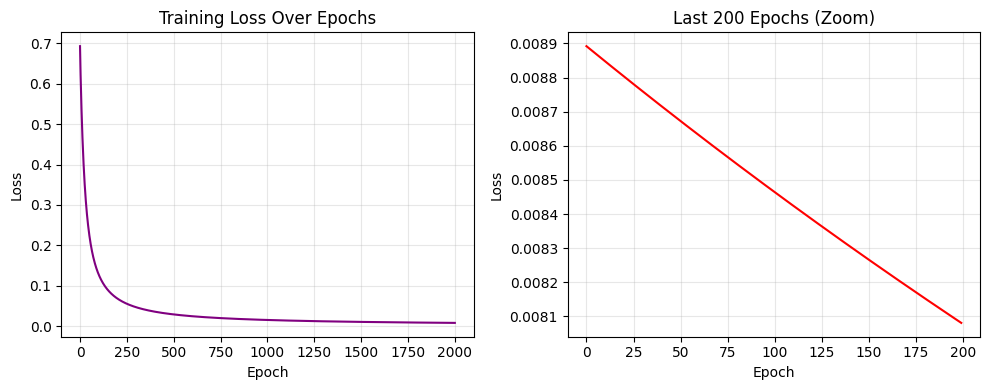

In [7]:
plt.figure(figsize=(10, 4))

# Full loss curve
plt.subplot(1, 2, 1)
plt.plot(loss_history, color='purple', linewidth=1.5)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, alpha=0.3)

# Zoom on last 200 epochs
plt.subplot(1, 2, 2)
plt.plot(loss_history[-200:], color='red', linewidth=1.5)
plt.title('Last 200 Epochs (Zoom)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#Plot Decision Boundary (Using First Two Features)

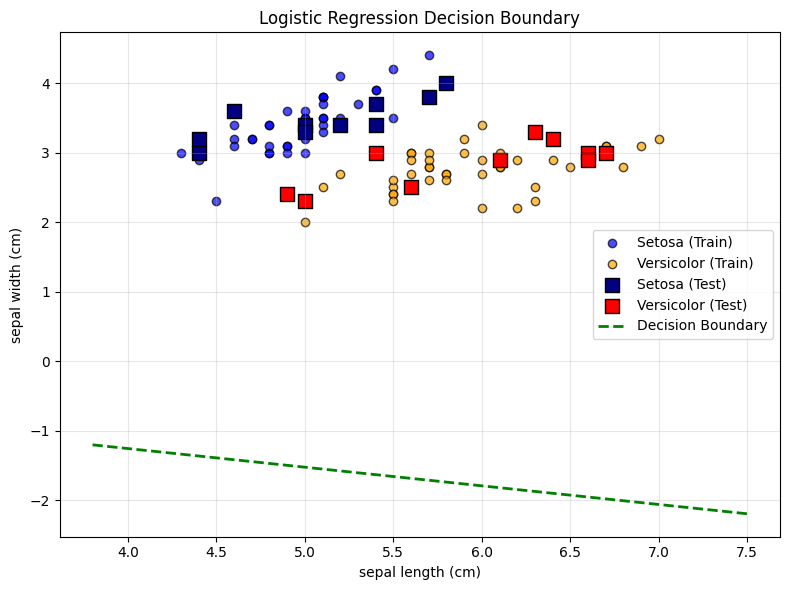

In [8]:
plt.figure(figsize=(8, 6))

# Training data
plt.scatter(X_train[y_train==0][:, 0], X_train[y_train==0][:, 1],
            color='blue', label='Setosa (Train)', alpha=0.7, edgecolors='k')
plt.scatter(X_train[y_train==1][:, 0], X_train[y_train==1][:, 1],
            color='orange', label='Versicolor (Train)', alpha=0.7, edgecolors='k')

# Test data
plt.scatter(X_test[y_test==0][:, 0], X_test[y_test==0][:, 1],
            color='navy', marker='s', s=100, label='Setosa (Test)', edgecolors='k')
plt.scatter(X_test[y_test==1][:, 0], X_test[y_test==1][:, 1],
            color='red', marker='s', s=100, label='Versicolor (Test)', edgecolors='k')

# Decision boundary (using first two features)
w0, w1, w2 = weights[0], weights[1], weights[2]
x1_line = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200)
x2_line = -(w0 + w1 * x1_line) / w2
plt.plot(x1_line, x2_line, 'g--', linewidth=2, label='Decision Boundary')

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()